<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0626_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means
1. 랜덤으로 K개의 중심점 설정
2. 모든 데이터를 K개의 중심점과의 거리 계산 -> 가장 가까운 중심점을 선택하여 군집 결정
3. 군집별로 중심점 계산
4. 더 이상 군집이 바뀌지 않을 때까지 반복

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def distance(x1,x2):
    return sum((x1-x2)**2)**(1/2)

In [7]:
na1=np.array([1,2])
na2=np.array([5,5])
print(distance(na1,na2))

5.0


In [23]:
def kmeans(data,k=3):
  #초기에 k개의 중심점을 구하라
  cis = np.random.choice(range(len(data)),k)
  centers = np.array( [data[ci]    for ci in cis])

  cs = {} #클러스터 사전
  #반복
  while True:
    cs = {} #클러스터 사전
    #모든 데이터를 k개의 중심점에서 거리를 계산한다.
    for d in data:
      dis = np.array([distance(d,center) for center in centers])
      ai = np.argmin(dis) #최소 거리의 인덱스

      #가장 가까운 중심점에 속한 그룹에 속하게 한다.
      if ai not in cs: #존재하지 않는 그룹일 때
        cs[ai]=[] #새로운 그룹을 사전에 생성하여 보관
      cs[ai].append(d) #해당 그룹에 데이터를 속하게 한다.

    #새로운 중심점을 계산한다.
    ncenters=[]
    for i in range(k):
      xdata = np.array([x for x,_ in cs[i]])
      ydata = np.array([y for _,y in cs[i]])
      ncenters.append([xdata.mean(), ydata.mean()])

    #조건(기존 중심점과 새로운 중심점이 같으면)
    if np.array_equal(centers,ncenters):
      break#반복문을 탈출하시오.
    centers = ncenters
  return cs

In [24]:
n=100
data=np.array([[np.random.randint(0,100),
              np.random.randint(0,100)]
              for _ in range(n)])
data.shape

(100, 2)

In [25]:
cs=kmeans(data)
len(cs[0]),len(cs[1]),len(cs[2])

(33, 35, 32)

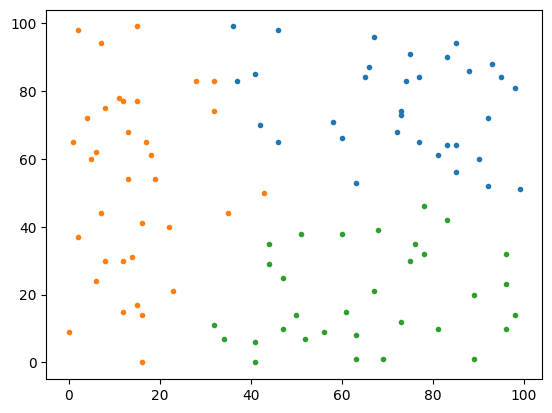

In [27]:
for i in range(3):
    xd=[arr[0] for arr in cs[i]]
    yd=[arr[1] for arr in cs[i]]
    plt.plot(xd,yd,'.')
plt.show()

In [28]:
import sklearn

In [ ]:
help(sklearn)

In [30]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [31]:
iris= load_iris()
data=iris.data
label=iris.target

In [34]:
model=KMeans(n_clusters=3)
model.fit(data)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 50, 38]))

In [37]:
df=pd.DataFrame(data)
df['target']=label
df['label']=model.labels_

In [40]:
df.groupby(['target','label'])['label'].count()

target  label
0       1        50
1       0        48
        2         2
2       0        14
        2        36
Name: label, dtype: int64

In [41]:
from sklearn.datasets import make_blobs

In [43]:
data,label=make_blobs(n_samples=200,n_features=2,centers=3)

In [44]:
data.shape

(200, 2)

In [45]:
label.shape

(200,)

In [46]:
df=pd.DataFrame(data,columns=['f1','f2'])
df['target']=label
df

,f1,f2,target
0,5.828067,-1.099564,1
1,-7.631134,6.605601,0
2,-8.735928,5.989241,0
3,6.094750,-7.659409,2
4,6.444597,-1.077735,1
...,...,...,...
195,4.320585,-2.377223,1
196,4.790695,-10.252450,2
197,4.748135,-3.479381,1
198,6.134361,-3.366728,1


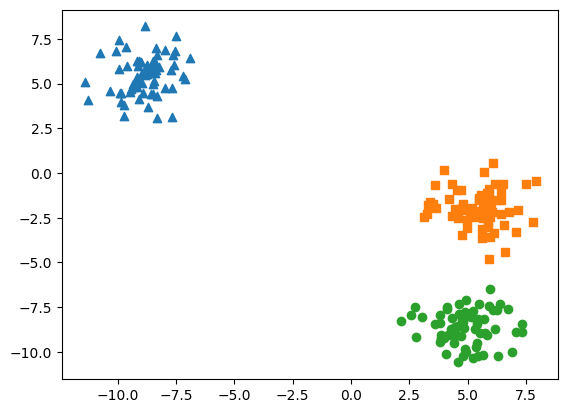

In [47]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    f_i=df['target']==i
    df_i=df[f_i]
    plt.scatter(df_i['f1'],df_i['f2'],marker=marker)
plt.show()

KeyError: ignored

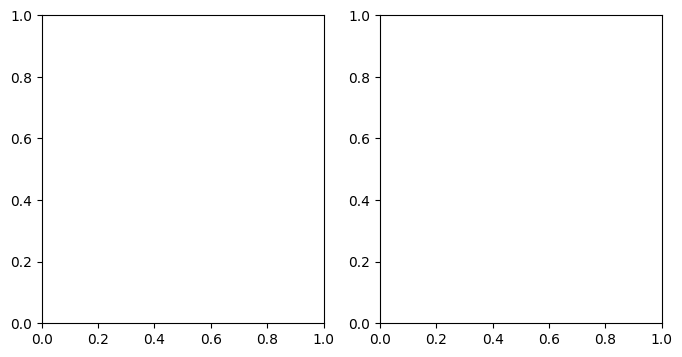

In [50]:
markers =['^','s','o']
colors = ['r','g','b']
c_colors = ['g','b','r']
_,axes = plt.subplots(ncols=2,figsize=(8,4))
for i,marker in enumerate(markers):
  f_i = df['label']==i
  df_i = df[f_i]
  axes[0].scatter(df_i['f1'],df_i['f2'],marker=marker,color=colors[i])
  center = model.cluster_centers_[i]
  axes[0].plot(center[0],center[1],color=c_colors[i],marker='.')

  f_i = df['target']==i
  df_i = df[f_i]
  axes[1].scatter(df_i['f1'],df_i['f2'],marker=marker,color=colors[i])
  center = model.cluster_centers_[i]
  axes[1].plot(center[0],center[1],color=c_colors[i],marker='.')


plt.show()

In [52]:
from sklearn.metrics import silhouette_samples,silhouette_score

iris= load_iris()
data=iris.data
label=iris.target
ss=silhouette_samples(data,label)
data.shape

(150, 4)

In [ ]:
df=pd.DataFrame(data,columns=iris.feature_names)
df['target']=label
df['label']=model.labels_
df['ss_t']=ss
df['ss_i']=ss2